In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.dataprocessing.transformers import Diff, BoxCox
from darts.utils.statistics import stationarity_test_adf, extract_trend_and_seasonality, plot_acf, plot_pacf
from darts.utils.utils import ModelMode, SeasonalityMode 
from darts.models import NaiveDrift
from darts.metrics.metrics import mae, mape, rmse, smape

In [90]:
# differencing for stationary mean - adf
# Box cox (lambda) for  stationary mean
# Seasonal differencing (season period) - adf
# Box cox + additive decomp = multiplicative decomp (not strictly)
# ACF (after taking diff) -> Relationship between past values and present -> Find sesonality and somewhat trends
# PACF (after taking diff) -> Relationshoip between past value (removving all intermediate value) and present
# Residual -> Should not have acf, pacf, be normally distributed with mean 0 (hist or 11 plot) - Lgung box test

In [ ]:
# MAE, RMSE, MAPE, SMAPE

In [78]:
passengers_series = AirPassengersDataset().load()
sunspot_series = SunspotsDataset().load()

(144, 1, 1)


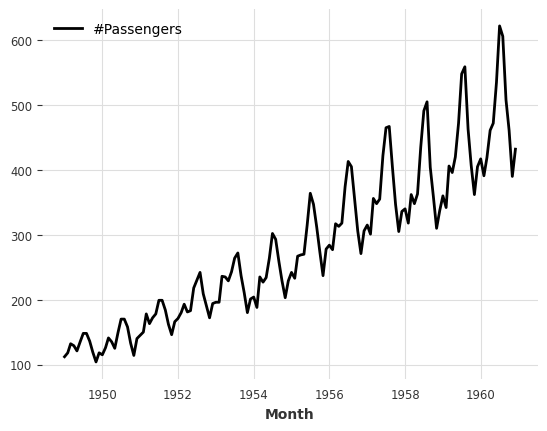

In [79]:
passengers_series.plot()
print(passengers_series.shape)

(2820, 1, 1)


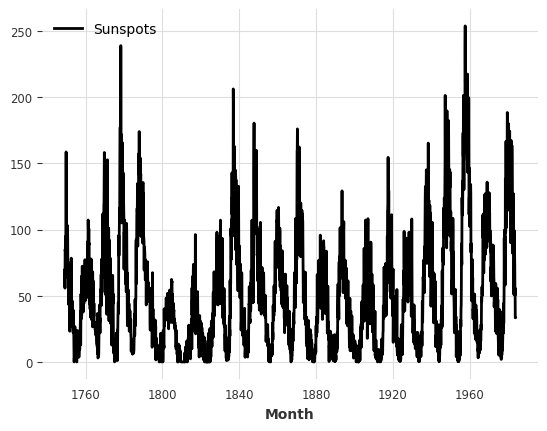

In [80]:
sunspot_series.plot()
print(sunspot_series.shape)

In [81]:
passengers_series_diff = Diff(lags=1).fit_transform(passengers_series)
sunspot_series_diff = Diff(lags=1).fit_transform(sunspot_series)


<Axes: xlabel='Month'>

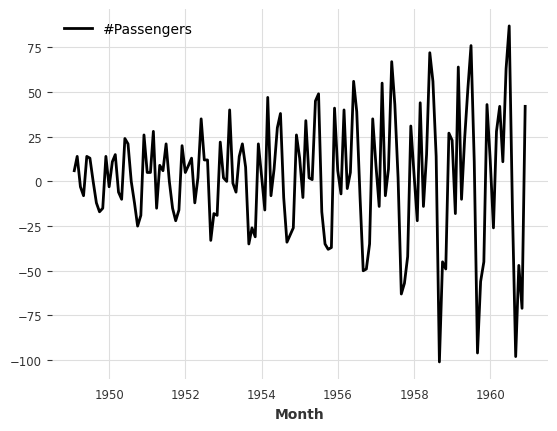

In [82]:
passengers_series_diff.plot()

<Axes: xlabel='Month'>

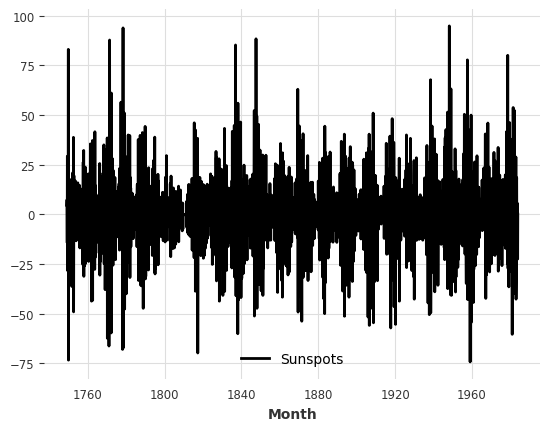

In [83]:
sunspot_series_diff.plot()

In [74]:
adf, pvalue, _, _, critical, _ = stationarity_test_adf(passengers_series)
print(adf, pvalue, critical)

0.8153688792060482 0.991880243437641 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [75]:
adf, pvalue, _, _, critical, _ = stationarity_test_adf(passengers_series_diff)
print(adf, pvalue, critical)

-2.8292668241699994 0.0542132902838255 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [96]:
passengers_series_diff_seasonal = Diff(lags=12).fit_transform(passengers_series)
sunspot_series_diff_seasonal = Diff(lags=1).fit_transform(sunspot_series)

<Axes: xlabel='Month'>

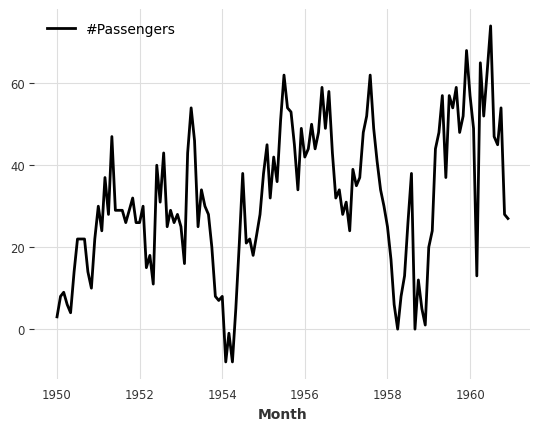

In [97]:
passengers_series_diff_seasonal.plot()

In [98]:
adf, pvalue, _, _, critical, _ = stationarity_test_adf(passengers_series_diff_seasonal)
print(adf, pvalue, critical)

-3.383020726492481 0.011551493085514954 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [122]:
a, b = extract_trend_and_seasonality(passengers_series, model=SeasonalityMode.ADDITIVE)

<Axes: xlabel='Month'>

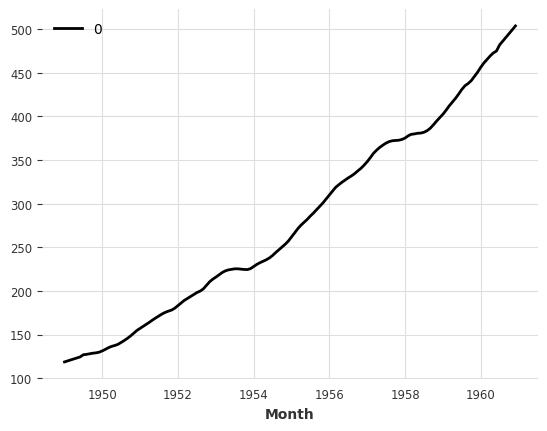

In [123]:
a.plot()

<Axes: xlabel='Month'>

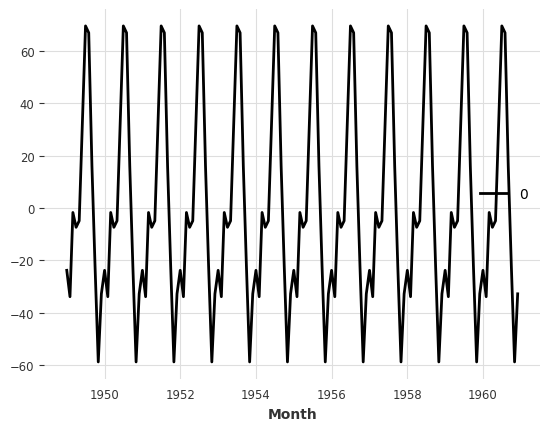

In [124]:
b.plot()

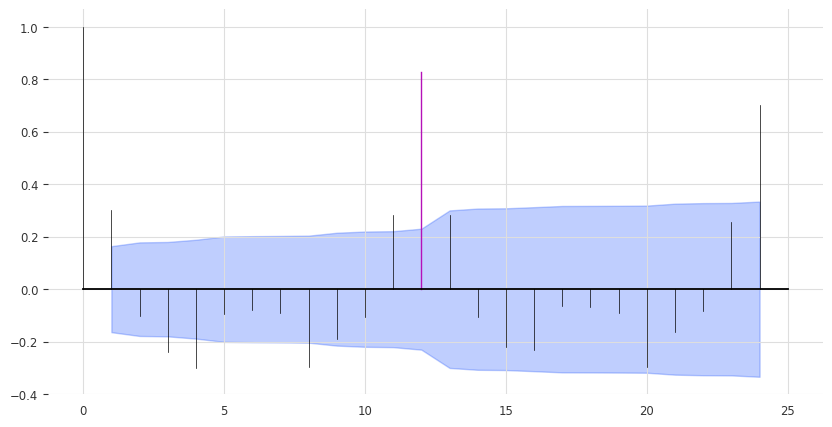

In [133]:
plot_acf(Diff(lags=1).fit_transform(passengers_series), m=12)

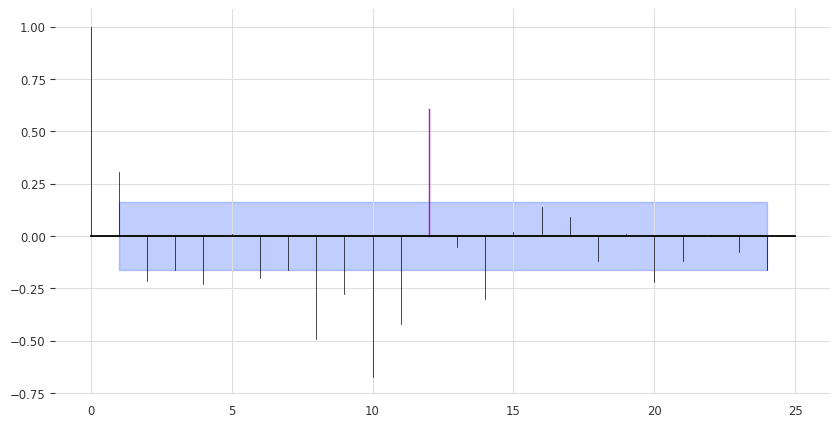

In [134]:
plot_pacf(Diff(lags=1).fit_transform(passengers_series), m=12)

In [142]:
passengers_series = AirPassengersDataset().load()
sunspot_series = SunspotsDataset().load()

p_train, p_test = passengers_series.split_after(0.75)
s_train, s_test = sunspot_series.split_after(0.75)

In [151]:
model = NaiveDrift()
model.fit(p_train)
p_pred = model.predict(p_test.shape[0])

<Axes: xlabel='Month'>

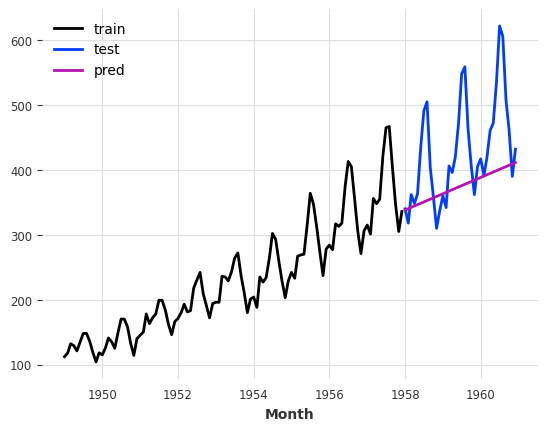

In [153]:
p_train.plot(label="train")
p_test.plot(label="test")
p_pred.plot(label="pred")

In [156]:
model = NaiveDrift()
model.fit(s_train)
s_pred = model.predict(s_test.shape[0])

<Axes: xlabel='Month'>

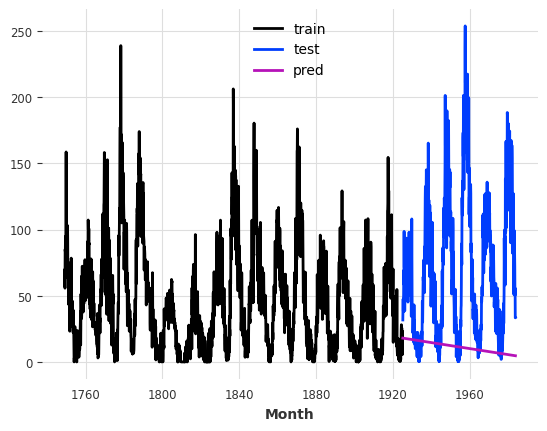

In [157]:
s_train.plot(label="train")
s_test.plot(label="test")
s_pred.plot(label="pred")

In [160]:
def evaluation(actual, pred):
    result = {}
    result["MAE"] = mae(actual, pred)
    result["RMSE"] = rmse(actual, pred)
    result["MAPE"] = mape(actual, pred)
    result["SMAPE"] = smape(actual, pred)
    return result

In [161]:
evaluation(p_test, p_pred)

{'MAE': 62.84215991692627,
 'RMSE': 87.72512915435708,
 'MAPE': 12.99046419013891,
 'SMAPE': 14.474716829798703}

In [162]:
evaluation(s_test, s_pred)

{'MAE': 61.14360058240572,
 'RMSE': 80.17033342688137,
 'MAPE': 134.92679249630896,
 'SMAPE': 124.69362284575669}

In [211]:
from darts.models import NaiveDrift

model = NaiveDrift()
model.fit(p_train)
# pred = model.predict(p_test.shape[0])

NaiveDrift()

<Axes: xlabel='Month'>

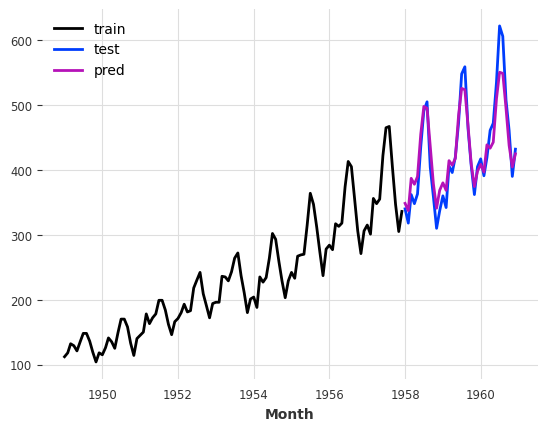

In [198]:
p_train.plot(label="train")
p_test.plot(label="test")
pred.plot(label="pred")

In [213]:
res = model.residuals(p_train)

<Axes: xlabel='time'>

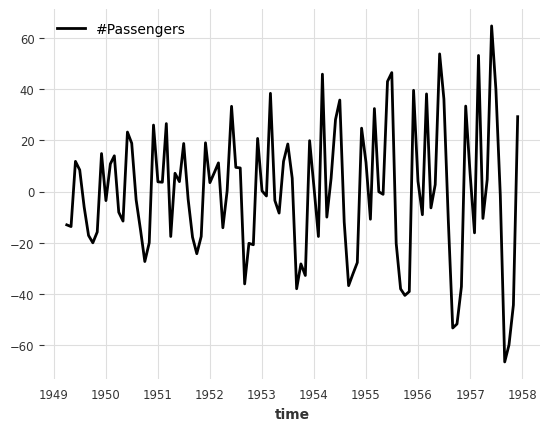

In [214]:
res.plot()

In [215]:
res.shape

(105, 1, 1)

In [216]:
p_train.shape

(108, 1, 1)